# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import string 
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
data = pd.read_csv('/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv')

In [3]:
data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   
10313  802313                                                  0   

       label (depression result)  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
10309                          1  
10310                          1  
10311                          1  
10312                          1  
10313                          1  

[10314 rows x 3 columns]

# **Data Exploration**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
# checking null vallues 
data.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [6]:
data.drop(index=10313, inplace=True)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
10308                          1  
10309                          1  
10310                          1  
10311                          1  
10312                          1  

[10313 rows x 3 columns]

In [7]:
data.describe().T

count          mean            std    min  \
Index                      10313.0  491223.30864  261682.893213  106.0   
label (depression result)  10313.0       0.22428       0.417128    0.0   

                                25%       50%       75%       max  
Index                      263019.0  514969.0  773448.0  802312.0  
label (depression result)       0.0       0.0       0.0       1.0

In [8]:
data.describe(include="object").T

count unique  \
message to examine  10313  10281   

                                                                  top freq  
message to examine  Mom's depression tied to kids' emotional, inte...   11

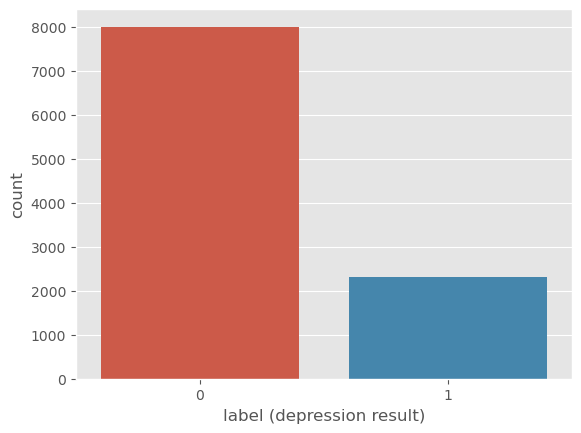

In [9]:
sns.countplot(x='label (depression result)',data = data)
plt.show()

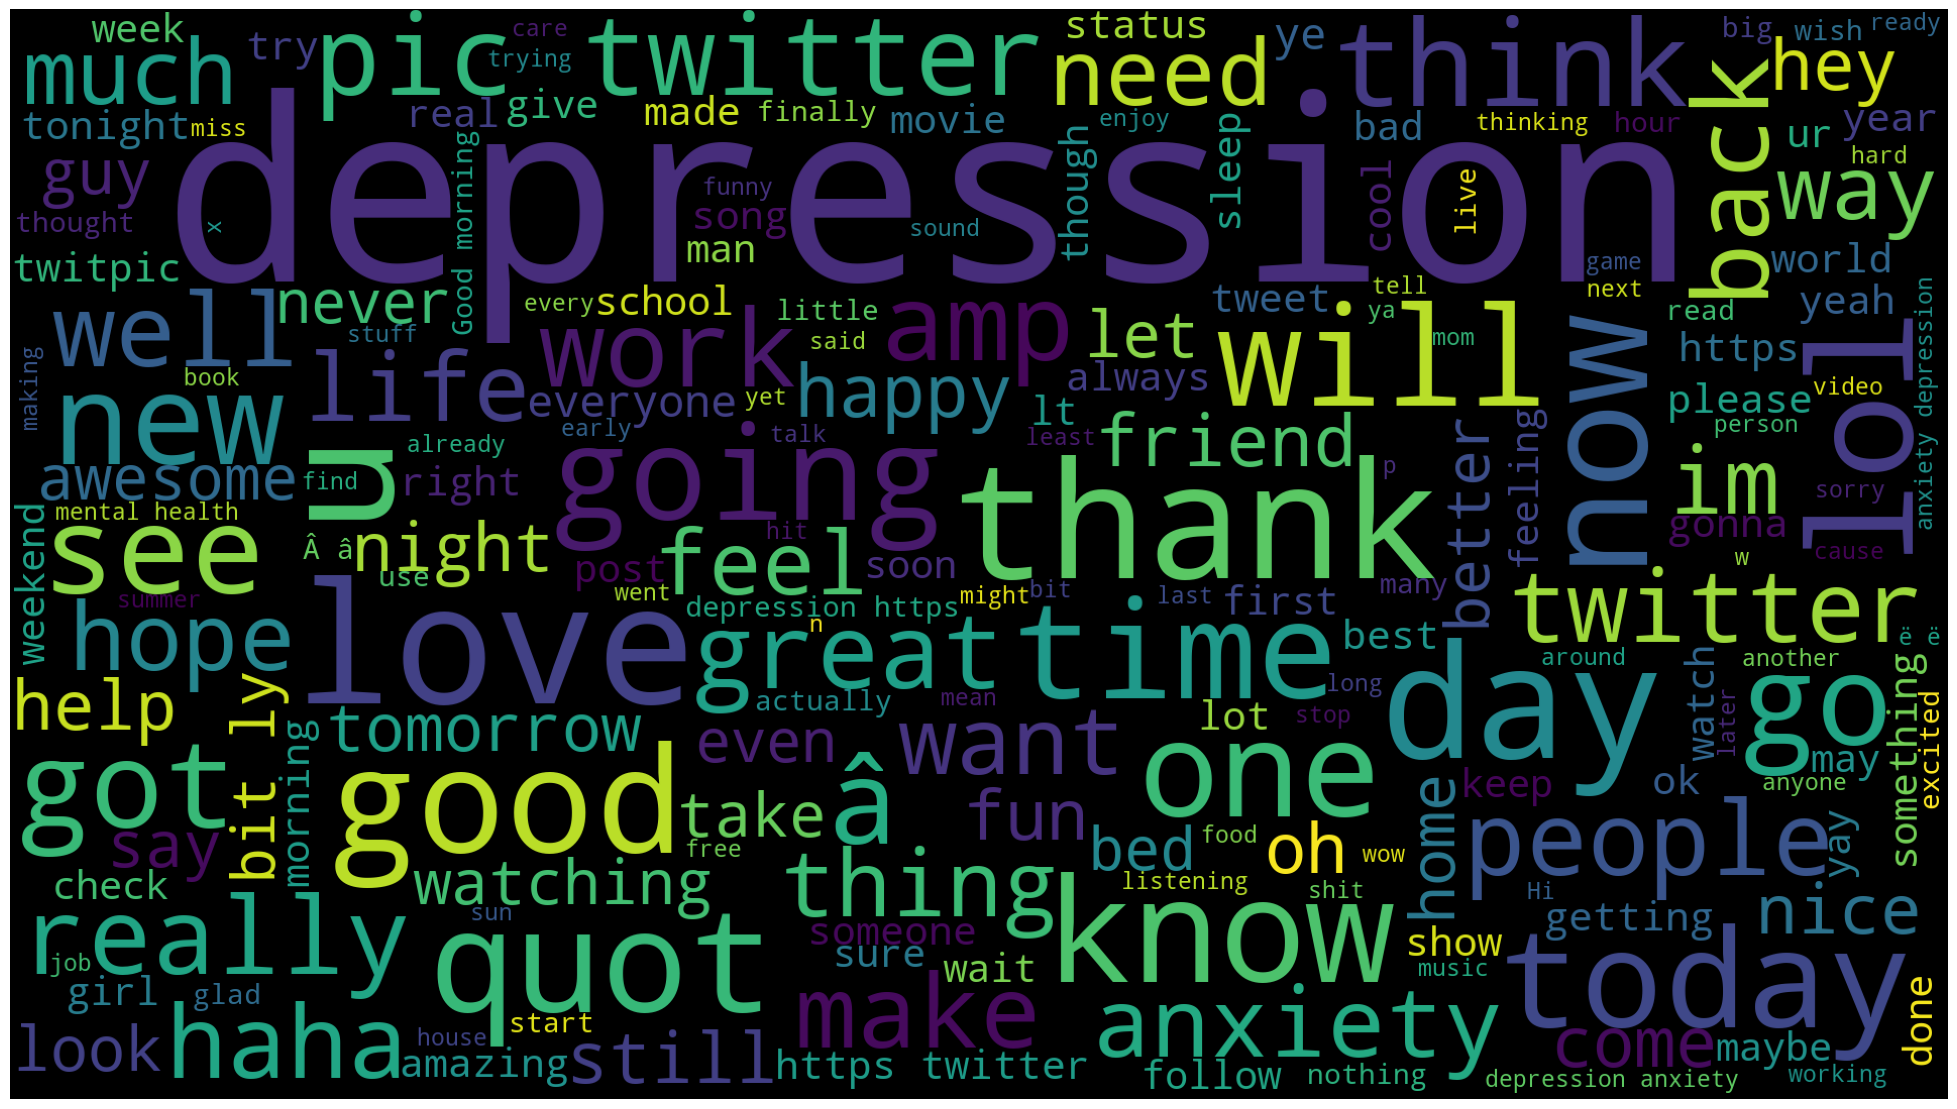

In [10]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

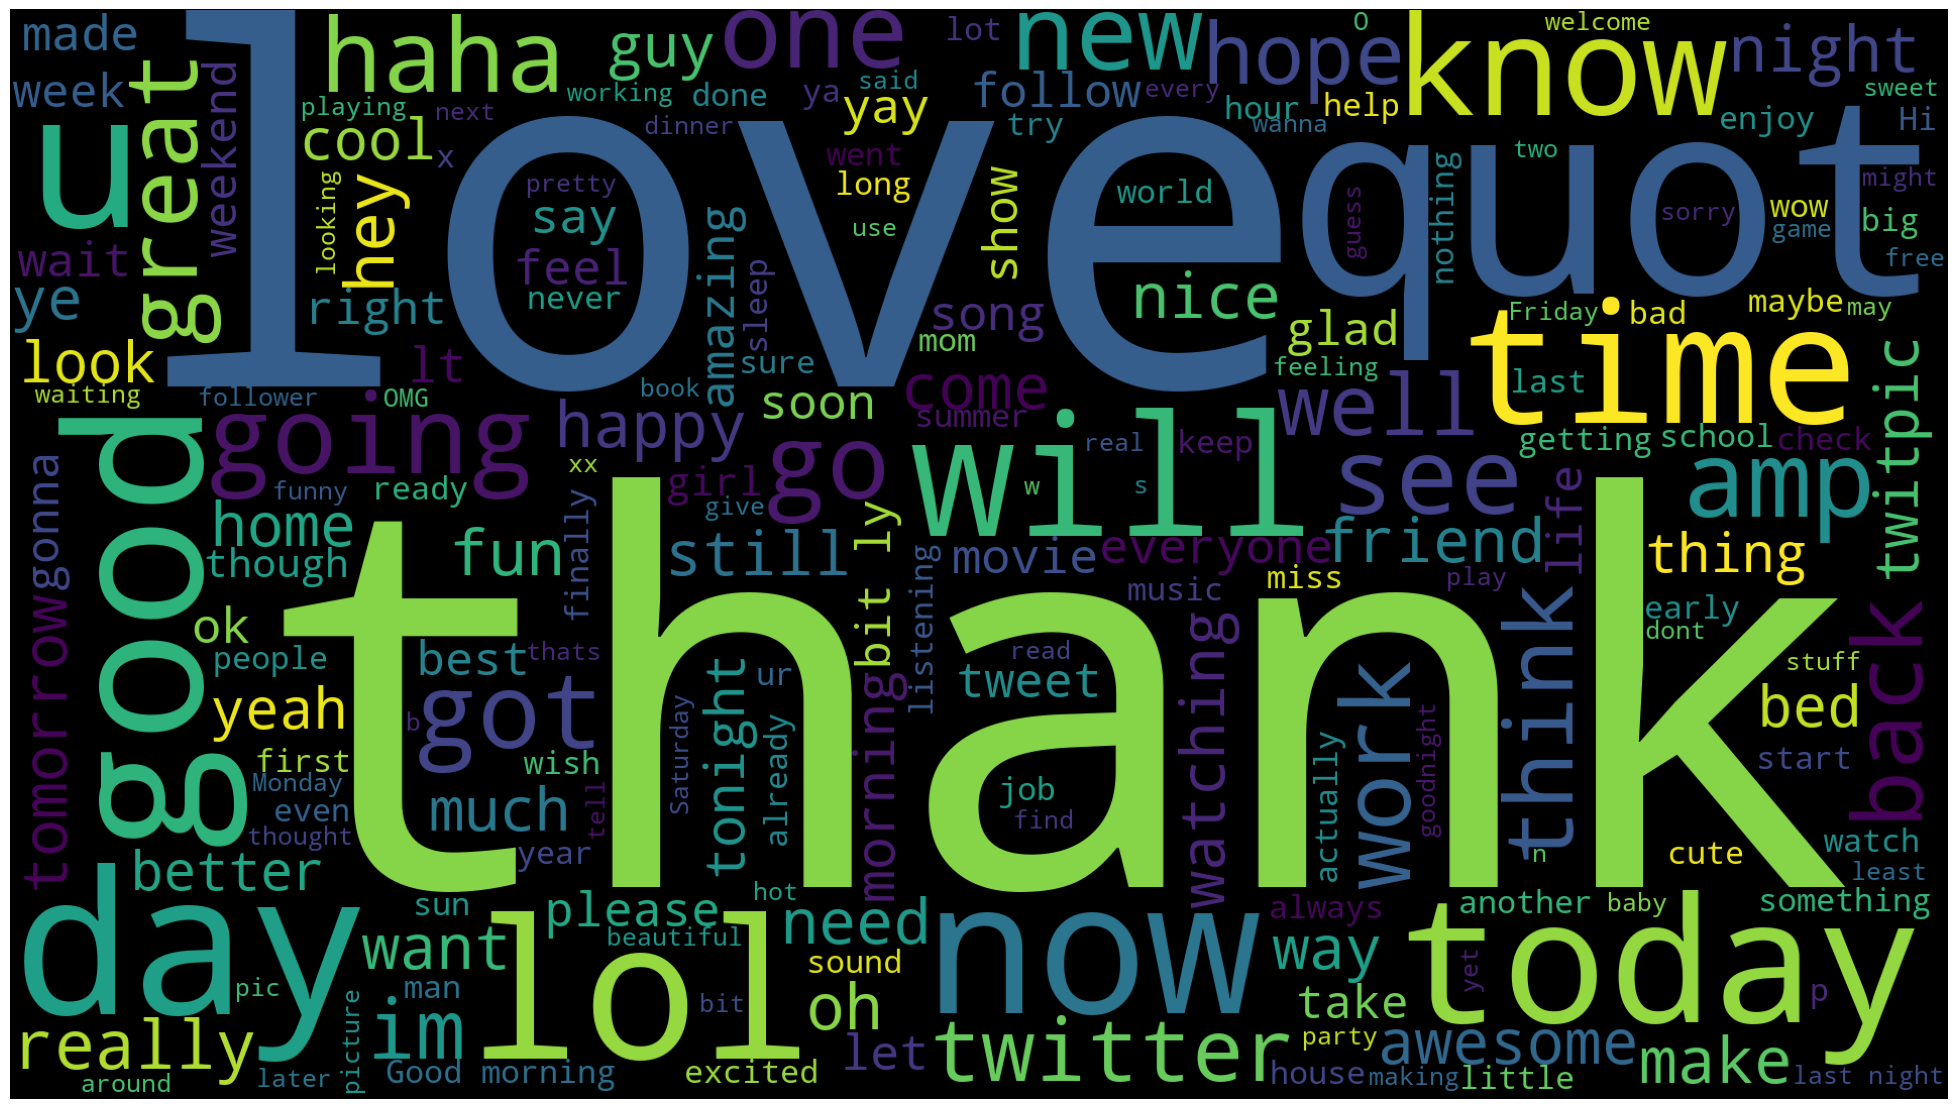

In [11]:
# Non Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data[data['label (depression result)'] == 0]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

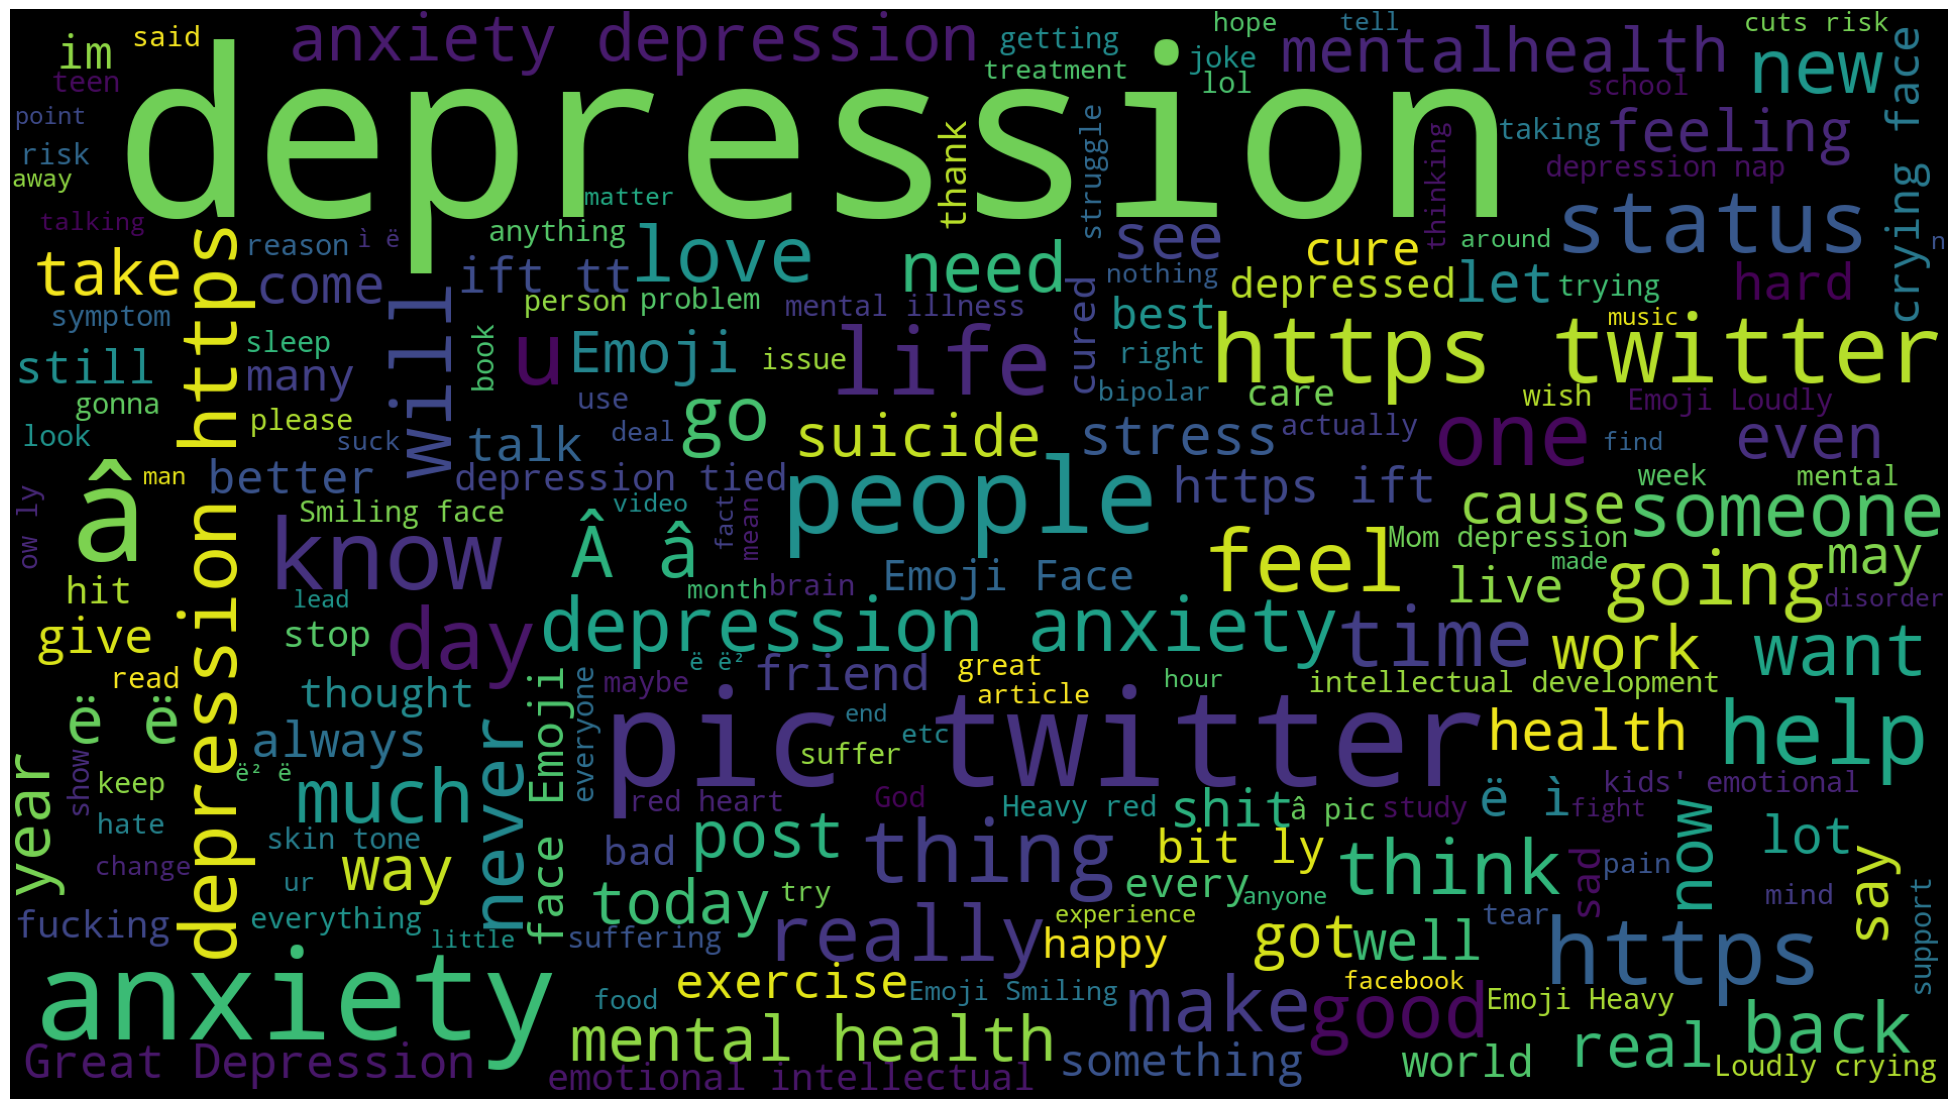

In [12]:
# Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data[data['label (depression result)'] == 1]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Text Preprocessing**

# **Removing URL’s**

In [13]:
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

data['urlsRemoved'] = data['message to examine'].apply(remove_urls)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  
0      just had a real good moment. i missssssssss hi...  
1                                     is reading manga    
2                                     @comeagainjen  -    
3      @lapcat Need to send 'em to my accountant tomo...  
4                                 ADD ME ON MYSPACE!!!    
...                                                  ...  
10308  Many sufferers of depression aren't sad; they ...  
10309  No Depression by G Herbo is my mood from now o...  
10310  What do you do when depression succumbs the br...  
10311  Ketamine Nasal Spray Shows Promise Against Dep...  
10312  dont mistake a bad day with depression! everyo...  

[10313 rows x 4 columns]

# **Removing Emoji and Emoticons**

In [14]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

data['emojiRemoved'] = data['urlsRemoved'].apply(remove_emoji)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  
0      just had a real good moment. i missssssssss hi...  
1                                     is reading manga    
2                                     @comeagainjen  -    
3      @lapcat Need to send 'em to my accountant tomo...  
4                                 ADD ME ON MYSPACE!!!    
...                                                  ...  
10308  Many sufferers of depression aren't sad; they ...  
10309  No Depression by G Herbo is my mood from now o...  
10310  What do you do when depression succumbs the br...  
10311  Ketamine Nasal Spray Shows Promise Against Dep...  
10312  dont mistake a bad day with depression! everyo...  

[10313 rows x 5 columns]

# **Removing Punctuations**

In [15]:
import re

# match all non-alphanumeric and non-whitespace characters,
pattern = r"[^\w\s]"


data['punkt'] = data['emojiRemoved'].apply(lambda x: re.sub(pattern, " ", x))

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                                   punkt  
0      just had a real good moment  i missssssssss hi...  
1                                     is reading manga    
2                                      comeagainjen       
3       lapcat Need to send  em to my accountant tomo...  
4                                 ADD ME ON MYSPACE       
...                                                  ...  
10308  Many sufferers of depression aren t sad  they ...  
10309  No Depression by G Herbo is my mood from now o...  
10310  What do you do when depression succumbs the br...  
10311  Ketamine Nasal Spray Shows Promise Against Dep...  
10312  dont mistake a bad day with depression  everyo...  

[10313 rows x 6 columns]

# **Removing Stop Words**

In [16]:
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

data['stopWord_Removed'] = data['punkt'].apply(stopwords)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                                   punkt  \
0      just had a real good moment  i missssssssss hi...   
1                                     is reading manga     
2                                      comeagainjen        
3       lapcat Need to send  em to my accountant tomo...   
4                                 ADD ME ON MYSPACE        
...                                                  ...   
10308  Many sufferers of depression aren t sad  they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression  everyo...   

                                        stopWord_Removed  
0                     real good moment missssssssss much  
1                                          reading manga  
2                                           comeagainjen  
3      lapcat Need send em accountant tomorrow Oddly ...  
4                                      ADD ME ON MYSPACE  
...                                                  ...  
10308  Many sufferers depression sad feel nothing per...  
10309  No Depression G Herbo mood done stressing peop...  
10310  What depression succumbs brain makes feel like...  
10311

# **Lemmatization**

In [17]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data['lemmatizedRows'] = data['stopWord_Removed'].apply(lemmatizeRows)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                                   punkt  \
0      just had a real good moment  i missssssssss hi...   
1                                     is reading manga     
2                                      comeagainjen        
3       lapcat Need to send  em to my accountant tomo...   
4                                 ADD ME ON MYSPACE        
...                                                  ...   
10308  Many sufferers of depression aren t sad  they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression  everyo...   

                                        stopWord_Removed  \
0                     real good moment missssssssss much   
1                                          reading manga   
2                                           comeagainjen   
3      lapcat Need send em accountant tomorrow Oddly ...   
4                                      ADD ME ON MYSPACE   
...                                                  ...   
10308  Many sufferers depression sad feel nothing per...   
10309  No Depression G Herbo mood done stressing peop...   
10310  What depression succumbs brain makes feel like..

# **Stemming**

In [18]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data['stemmedRows'] = data['lemmatizedRows'].apply(stemRows)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                                   punkt  \
0      just had a real good moment  i missssssssss hi...   
1                                     is reading manga     
2                                      comeagainjen        
3       lapcat Need to send  em to my accountant tomo...   
4                                 ADD ME ON MYSPACE        
...                                                  ...   
10308  Many sufferers of depression aren t sad  they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression  everyo...   

                                        stopWord_Removed  \
0                     real good moment missssssssss much   
1                                          reading manga   
2                                           comeagainjen   
3      lapcat Need send em accountant tomorrow Oddly ...   
4                                      ADD ME ON MYSPACE   
...                                                  ...   
10308  Many sufferers depression sad feel nothing per...   
10309  No Depression G Herbo mood done stressing peop...   
10310  What depression succumbs brain makes feel like..

# **Tokens Cleaning**

In [19]:
def cleanData(text):

    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )  # Remove repeating characters from tokens

    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) # Remove tokens containing digits

    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] ) # Remove tokens containing underscore

    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) # Remove tokens containing Special Characters

    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  # Remove tokens less than 2 characters


data['cleanTokens'] = data['stemmedRows'].apply(cleanData)

data

Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10308  802308  Many sufferers of depression aren't sad; they ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   

       label (depression result)  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
10308                          1   
10309                          1   
10310                          1   
10311                          1   
10312                          1   

                                             urlsRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                            emojiRemoved  \
0      just had a real good moment. i missssssssss hi...   
1                                     is reading manga     
2                                     @comeagainjen  -     
3      @lapcat Need to send 'em to my accountant tomo...   
4                                 ADD ME ON MYSPACE!!!     
...                                                  ...   
10308  Many sufferers of depression aren't sad; they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression! everyo...   

                                                   punkt  \
0      just had a real good moment  i missssssssss hi...   
1                                     is reading manga     
2                                      comeagainjen        
3       lapcat Need to send  em to my accountant tomo...   
4                                 ADD ME ON MYSPACE        
...                                                  ...   
10308  Many sufferers of depression aren t sad  they ...   
10309  No Depression by G Herbo is my mood from now o...   
10310  What do you do when depression succumbs the br...   
10311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  dont mistake a bad day with depression  everyo...   

                                        stopWord_Removed  \
0                     real good moment missssssssss much   
1                                          reading manga   
2                                           comeagainjen   
3      lapcat Need send em accountant tomorrow Oddly ...   
4                                      ADD ME ON MYSPACE   
...                                                  ...   
10308  Many sufferers depression sad feel nothing per...   
10309  No Depression G Herbo mood done stressing peop...   
10310  What depression succumbs brain makes feel like..

# **TF-IDF Vectorization**

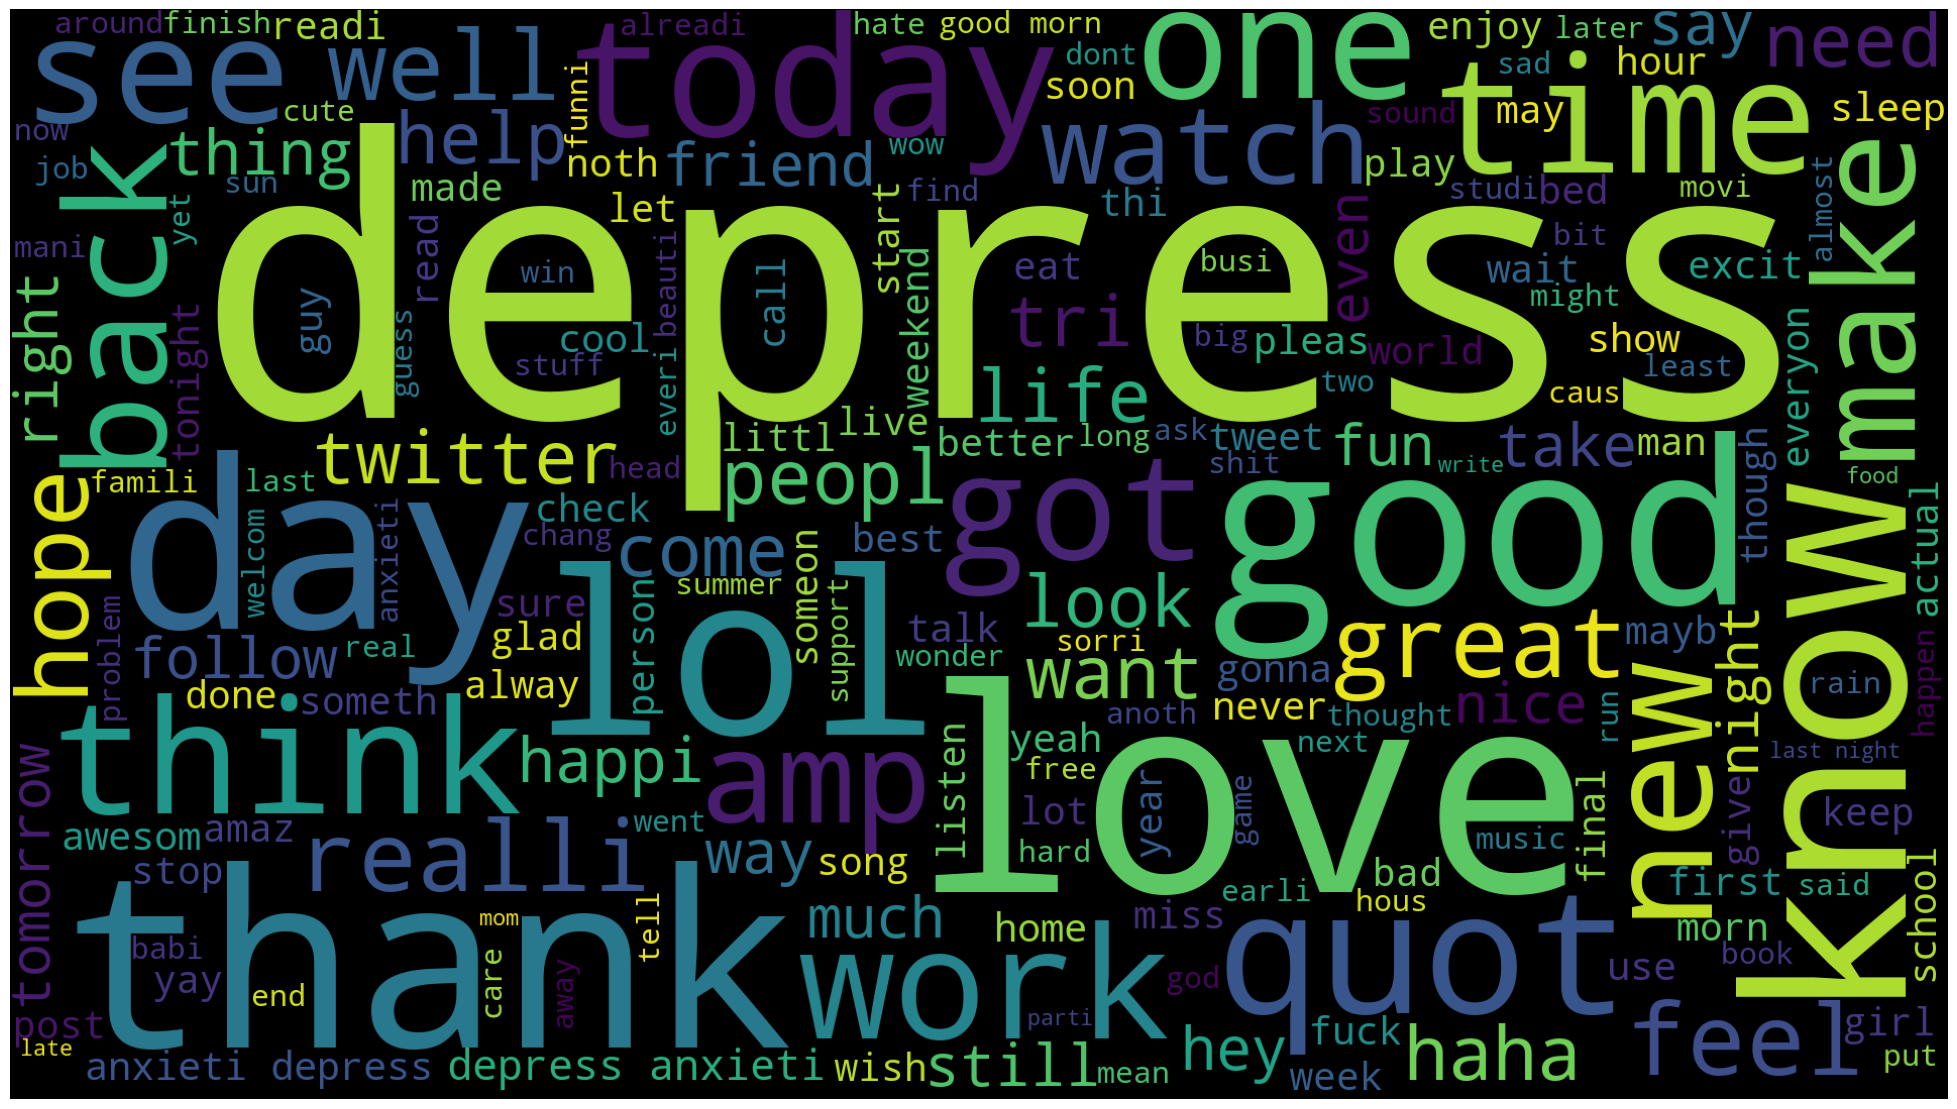

In [20]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data['cleanTokens']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

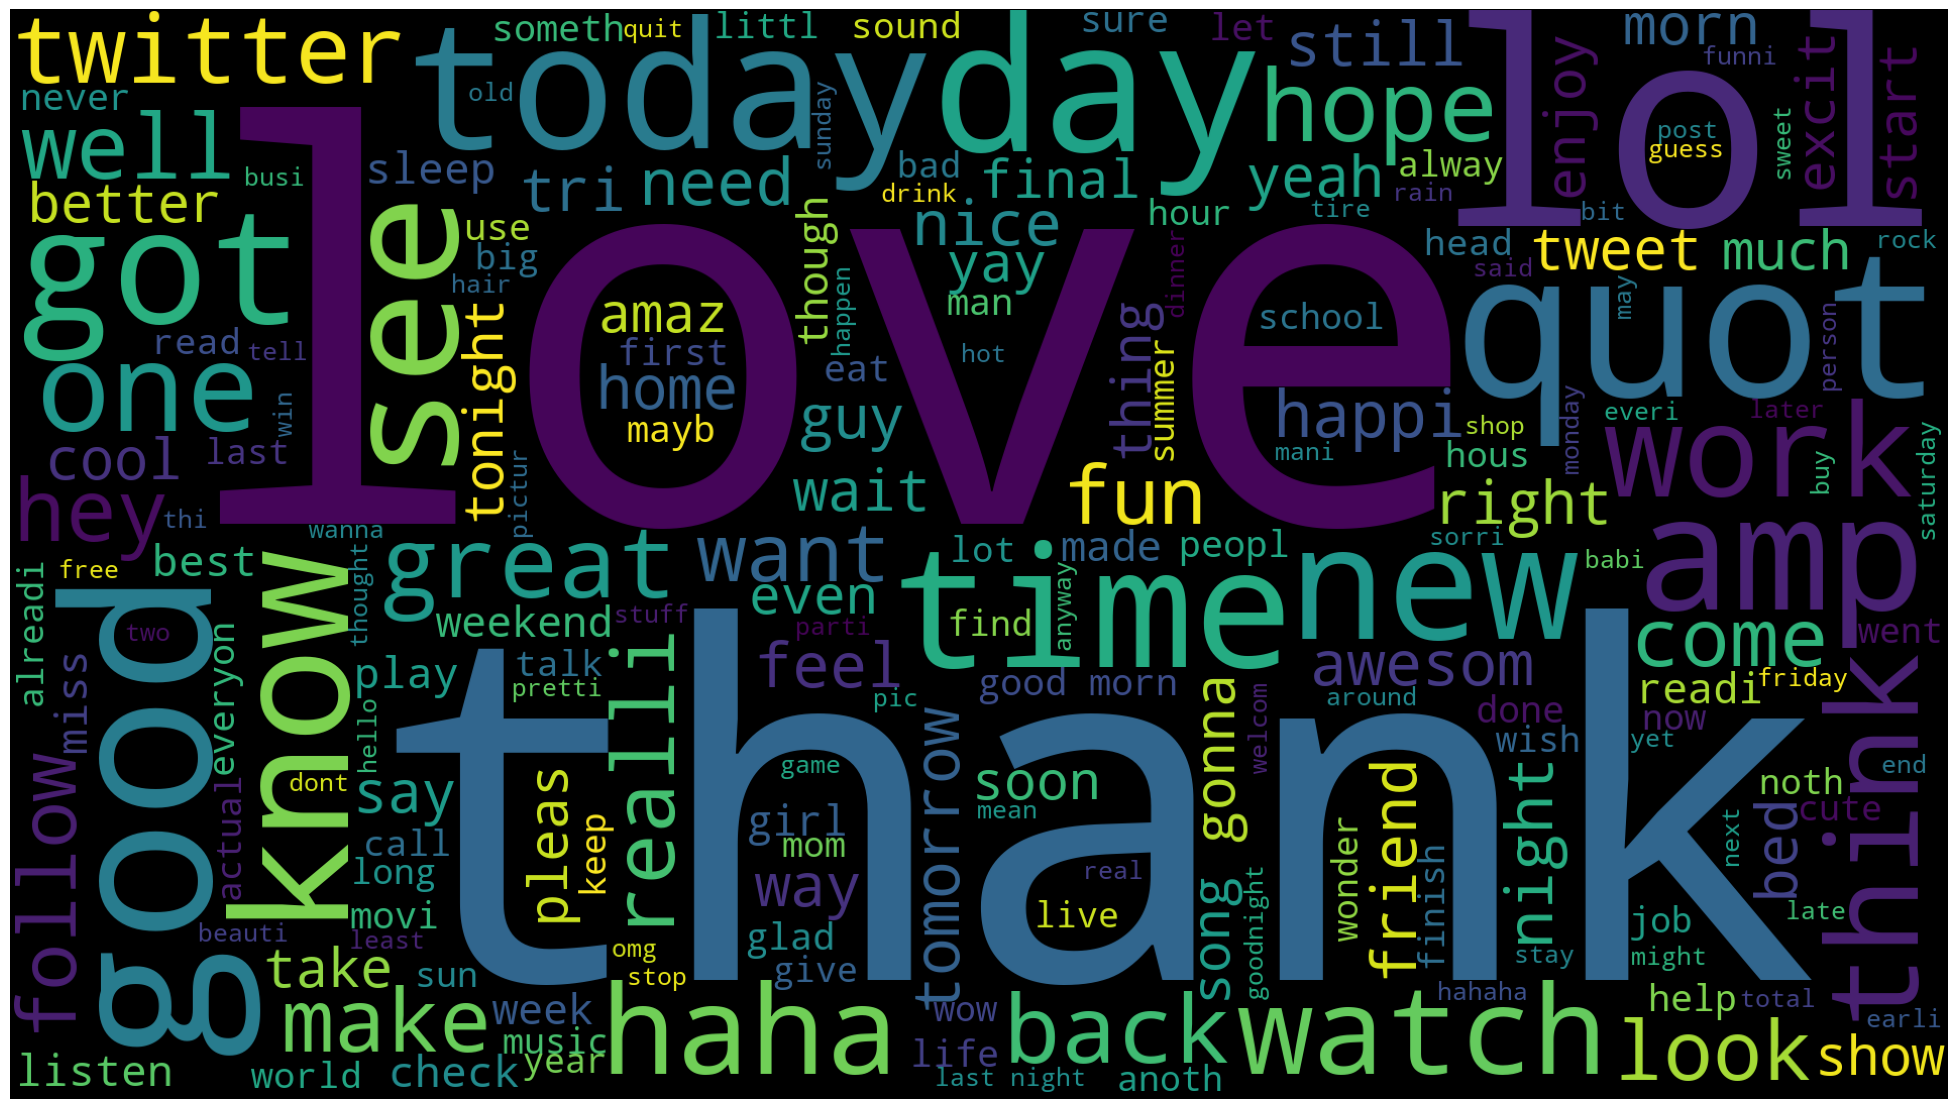

In [21]:
# Non Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data[data['label (depression result)'] == 0]['cleanTokens']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

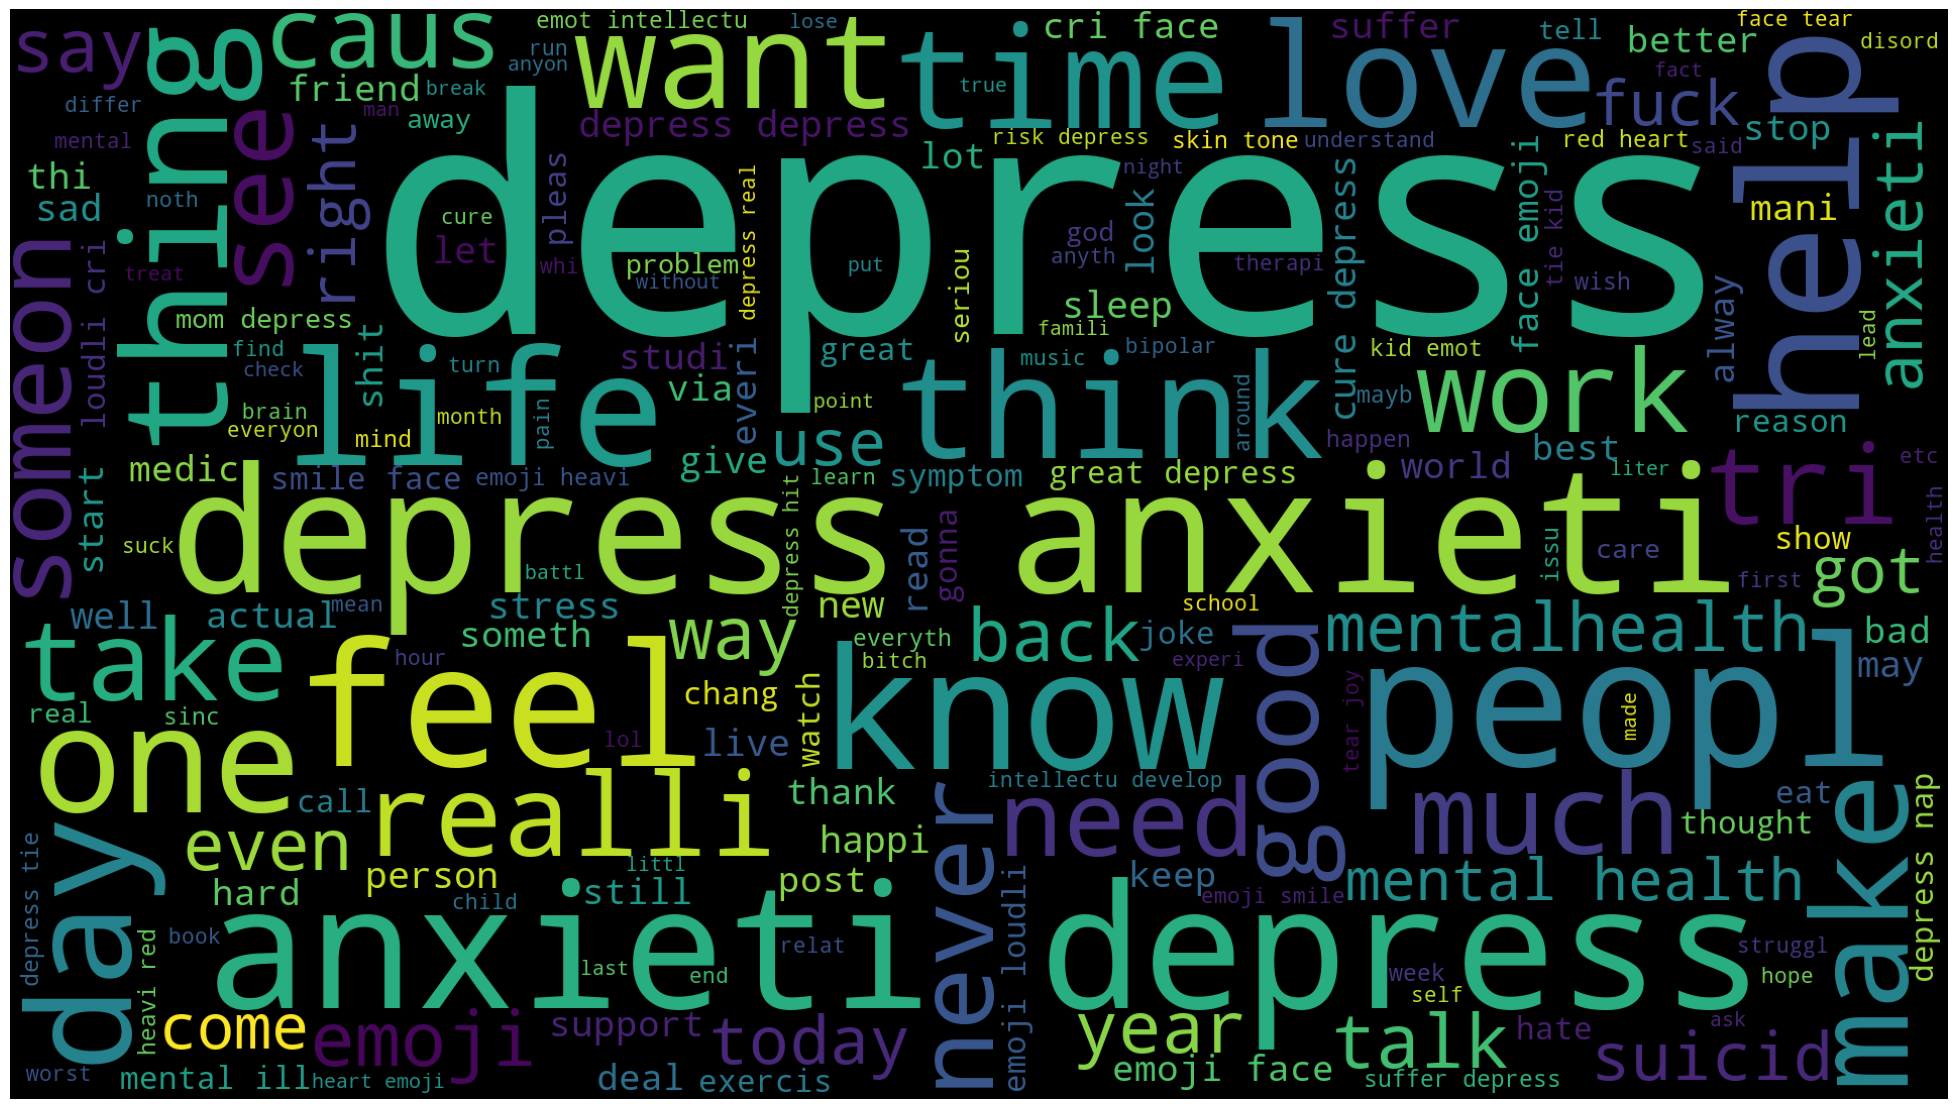

In [22]:
# Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(data[data['label (depression result)'] == 1]['cleanTokens']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(data['cleanTokens'])

feature_names = Vectorizer.get_feature_names_out()

pd.DataFrame(dataVectorized.toarray(), columns = feature_names)

aacerr  aacura  aah  aahahaa  aahh  aahhaha  aaron  aaronmcarrol  \
0         0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
1         0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
2         0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
3         0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
4         0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
...       ...     ...  ...      ...   ...      ...    ...           ...   
10308     0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
10309     0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
10310     0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
10311     0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   
10312     0.0     0.0  0.0      0.0   0.0      0.0    0.0           0.0   

       abandon  abat  ...  zombien  zombilici  zomg  zone  zoo  zoot  zooyork  \
0          0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
1          0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
2          0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
3          0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
4          0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
...        ...   ...  ...      ...        ...   ...   ...  ...   ...      ...   
10308      0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
10309      0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
10310      0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
10311      0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   
10312      0.0   0.0  ...      0.0        0.0   0.0   0.0  0.0   0.0      0.0   

       zpush  ztnewetnorb  zumba  
0        0.0          0.0    0.0  
1        0.0          0.0    0.0  
2        0.0          0.0    0.0  
3        0.0          0.0    0.0  
4        0.0          0.0    0.0  
...      ...          ...    ...  
10308    0.0          0.0    0.0  
10309    0.0          0.0    0.0  
10310    0.0          0.0    0.0  
10311    0.0          0.0    0.0  
10312    0.0          0.0    0.0  

[10313 rows x 14869 columns]

In [24]:
dataVectorized.toarray().shape

(10313, 14869)

In [25]:
feature_names[:1000]

array(['aacerr', 'aacura', 'aah', 'aahahaa', 'aahh', 'aahhaha', 'aaron',
       'aaronmcarrol', 'abandon', 'abat', 'abatevintag', 'abbi',
       'abbrevi', 'abbynorm', 'abbyrosia', 'abc', 'abdulla', 'abduzeedo',
       'abe', 'abeautyhealthi', 'abecryst', 'abeerak', 'abel', 'abhor',
       'abi', 'abil', 'abit', 'abl', 'abnorm', 'aboard', 'abokssignatur',
       'abort', 'aboslut', 'abound', 'about', 'abraham', 'abroad',
       'absenc', 'absent', 'absinth', 'absolout', 'absolut', 'absolutli',
       'absorb', 'abt', 'abu', 'abund', 'abus', 'academ', 'academi',
       'acb', 'acc', 'accent', 'accept', 'acceptancei', 'access',
       'accessori', 'accid', 'accident', 'accommod', 'accompani',
       'accomplish', 'accord', 'accordingli', 'account', 'accout', 'acct',
       'acctng', 'accur', 'accus', 'acdc', 'ace', 'aceconcierg', 'aceppt',
       'aceybongo', 'ach', 'achiev', 'achiv', 'achja', 'acho', 'acidicic',
       'acim', 'acmpr', 'acn', 'acoust', 'acquant', 'across', 'acryl',
    

# **Splitting Data**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(dataVectorized, data['label (depression result)'], test_size=0.2,
                                                    stratify= data['label (depression result)']  , random_state=0)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8250, 14869), (8250,), (2063, 14869), (2063,))

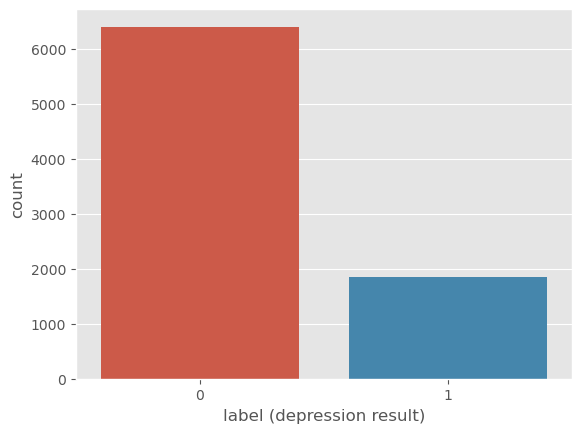

In [28]:
sns.countplot(x=y_train)
plt.show()

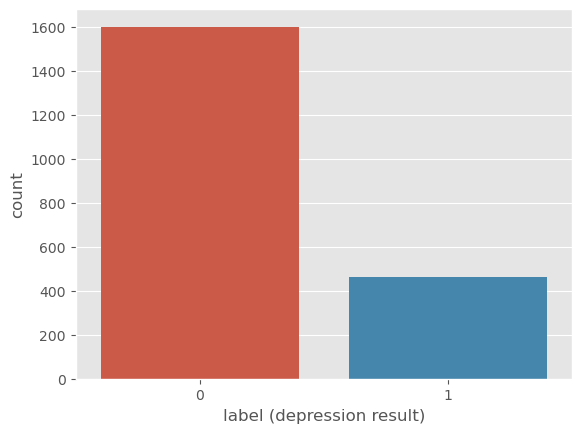

In [29]:
sns.countplot(x=y_test)
plt.show()

In [30]:
from sklearn.utils import compute_class_weight

classWeights = compute_class_weight("balanced", classes = np.unique(data['label (depression result)']),
                                     y = data['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(data['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.6445625, 1: 2.229355814958928}


# **Fitting Models**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [32]:
lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

svc = LinearSVC(class_weight=classWeights, random_state=0)

In [ ]:
lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)

svc.fit(X_train.toarray(), y_train)

In [34]:
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

svcScore = svc.score(X_train.toarray(), y_train)

In [35]:
colors = plt.cm.viridis(np.linspace(0, 1, 5))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests", "Support Vector"]

Logistic Regression Train Accuracy score is : 99.75%

Naive Bayes Train Accuracy score is : 94.32%

Decision Tree Train Accuracy score is : 99.95%

Random Forest Train Accuracy score is : 99.95%

Support Vector Train Accuracy score is : 99.95%


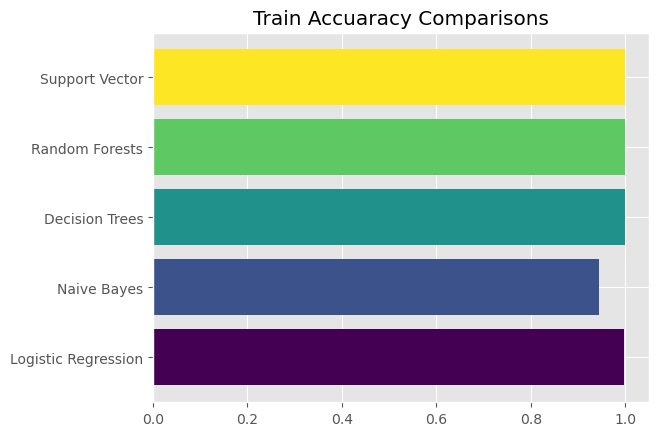

In [36]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Train Accuracy score is : {round(svcScore * 100 , 2)}%')

In [37]:
lrScore = lr.score(X_test.toarray(), y_test)

nbScore = nb.score(X_test.toarray(), y_test)

dtScore = dt.score(X_test.toarray(), y_test)

rfScore = rf.score(X_test.toarray(), y_test)

svcScore = svc.score(X_test.toarray(), y_test)

Logistic Regression Test Accuracy score is : 99.42%

Naive Bayes Test Accuracy score is : 91.81%

Decision Tree Test Accuracy score is : 99.61%

Random Forest Test Accuracy score is : 99.56%

Support Vector Test Accuracy score is : 99.37%


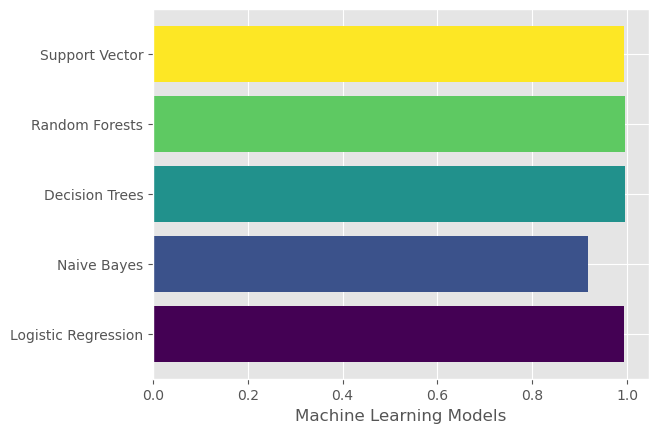

In [38]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Accuracy score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Test Accuracy score is : {round(svcScore * 100 , 2)}%')

# **Evaluating Models**

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [40]:
lrPreds = lr.predict(X_test.toarray())

nbPreds = nb.predict(X_test.toarray())

dtPreds = dt.predict(X_test.toarray())

rfPreds = rf.predict(X_test.toarray())

svcPreds = svc.predict(X_test.toarray())

In [41]:
lrScore = roc_auc_score(lrPreds, y_test)

nbScore = roc_auc_score(nbPreds, y_test)

dtScore = roc_auc_score(dtPreds, y_test)

rfScore = roc_auc_score(rfPreds, y_test)

svcScore = roc_auc_score(svcPreds, y_test)

Logistic Regression Test Roc Auc Score is : 99.63%

Naive Bayes Test Roc Auc Score is : 94.65%

Decision Tree Test Roc Auc Score is : 99.75%

Random Forest Test Roc Auc Score is : 99.56%

Support Vector Test Roc Auc Score is : 99.6%


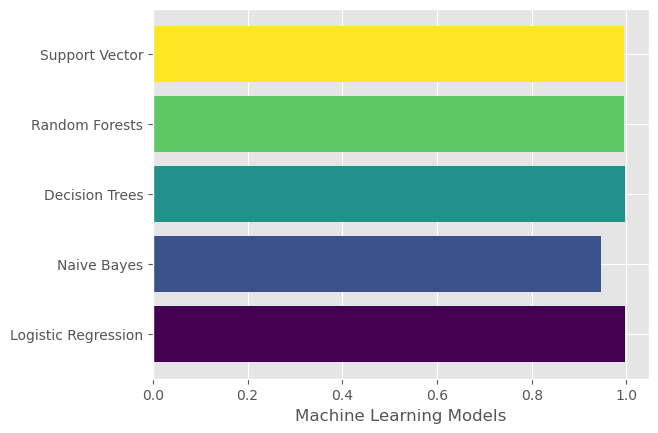

In [42]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore, svcScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Roc Auc Score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Roc Auc Score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Roc Auc Score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Roc Auc Score is : {round(rfScore * 100 , 2)}%')

print(f'\nSupport Vector Test Roc Auc Score is : {round(svcScore * 100 , 2)}%')

In [43]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

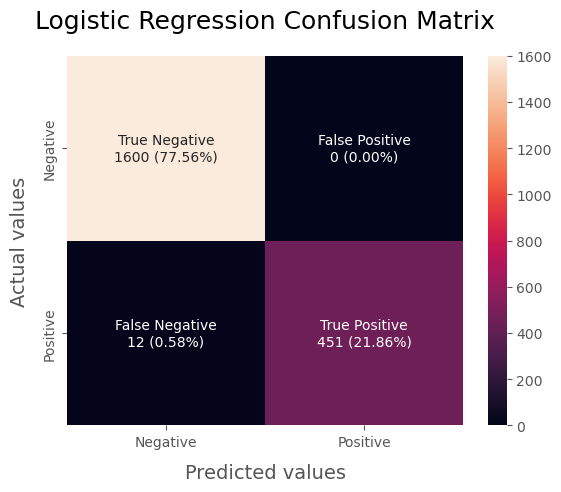

In [44]:
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

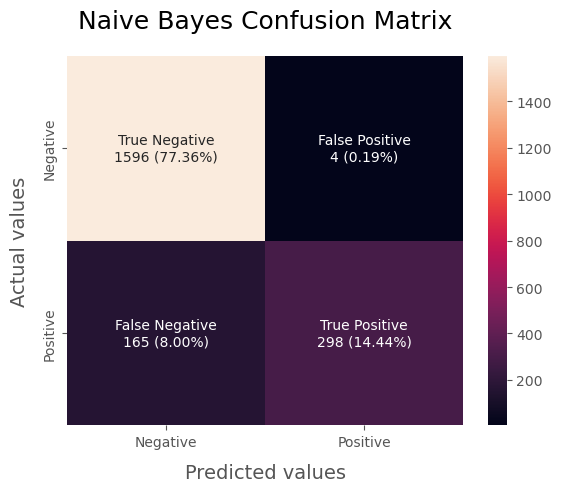

In [45]:
makeCM_Matrix(confusion_matrix(y_test, nbPreds), 'Naive Bayes')

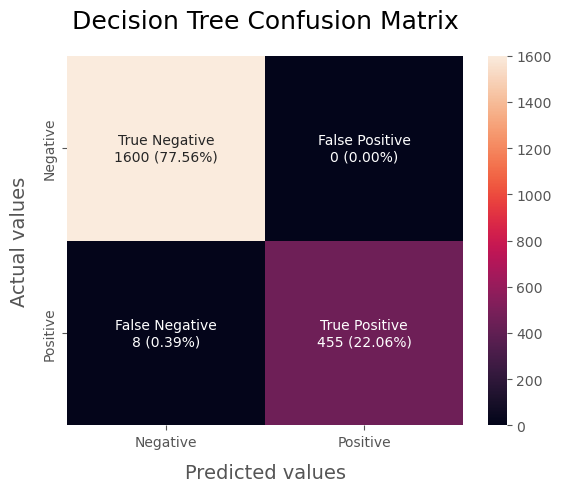

In [46]:
makeCM_Matrix(confusion_matrix(y_test, dtPreds), 'Decision Tree')

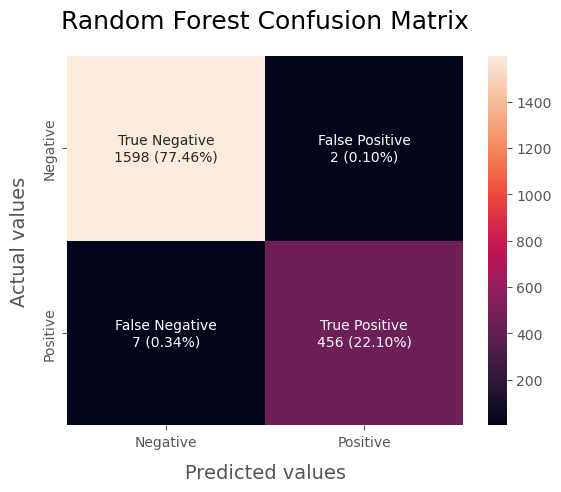

In [47]:
makeCM_Matrix(confusion_matrix(y_test, rfPreds), 'Random Forest')

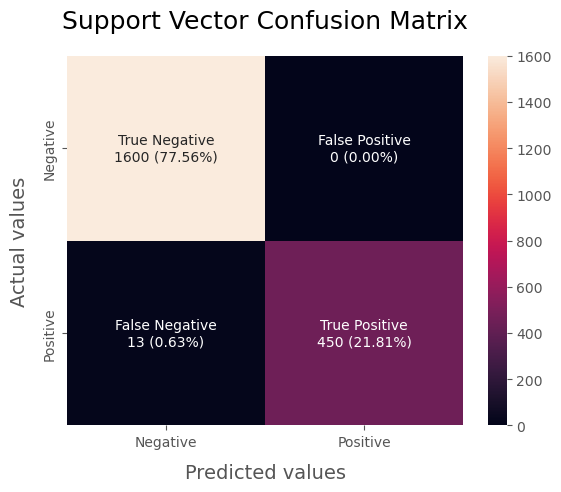

In [48]:
makeCM_Matrix(confusion_matrix(y_test, svcPreds), 'Support Vector')

In [49]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      1.00      1600
         Yes       1.00      0.97      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



In [50]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, nbPreds, target_names=['No','Yes'])
print('Naive Bayes Classification Report: \n', classification_report)

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

          No       0.91      1.00      0.95      1600
         Yes       0.99      0.64      0.78       463

    accuracy                           0.92      2063
   macro avg       0.95      0.82      0.86      2063
weighted avg       0.92      0.92      0.91      2063



In [51]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, dtPreds, target_names=['No','Yes'])
print('Decision Tree Classification Report: \n',classification_report)

Decision Tree Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1600
         Yes       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [52]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, rfPreds, target_names=['No','Yes'])
print('Random Forest Classification Report: \n',classification_report)

Random Forest Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1600
         Yes       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [53]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, svcPreds, target_names=['No','Yes'])
print('Support Vector Classification Report: \n',classification_report)

Support Vector Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      1.00      1600
         Yes       1.00      0.97      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

